# `snell_example_supersample.ipynb`

### Notebook with a few examples shwocasing anti-aliasing improvements as a result of super- and stochastic sampling

In [7]:
import snell
import matplotlib.pyplot as plt
import numpy as np
import tifffile

%matplotlib notebook
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Initialize display variables using class constructor

In [2]:
display = snell.snell(config = 'flat', dispres = 8000, dispcm = 2, ddisp = 1, dadw = 10)

#### Create spatial lookup table for this virtual display configuration

In [3]:
display.make_display()

/home/twd/Dropbox/snell/snell_tool/snell.py:78: RuntimeWarning: invalid value encountered in arcsin
  theta_prime = np.arcsin(self.nw*np.sin(theta_)/self.na)
/home/twd/Dropbox/snell/snell_tool/snell.py:119: RuntimeWarning: invalid value encountered in true_divide
  unit_x = x_cm/d_cm
/home/twd/Dropbox/snell/snell_tool/snell.py:120: RuntimeWarning: invalid value encountered in true_divide
  unit_y = y_cm/d_cm


#### Load in and transform some example images

#### Gratings:

In [12]:
OMR_air = tifffile.imread('./examples/example_grating_16000.tif')
OMR_snell = display.transform_image(OMR_air[:-1,:-1],smooth=False)
OMR_snell_stochastic = display.transform_image(OMR_air[:-1,:-1],smooth=False,stochastic=2)

<IPython.core.display.Javascript object>


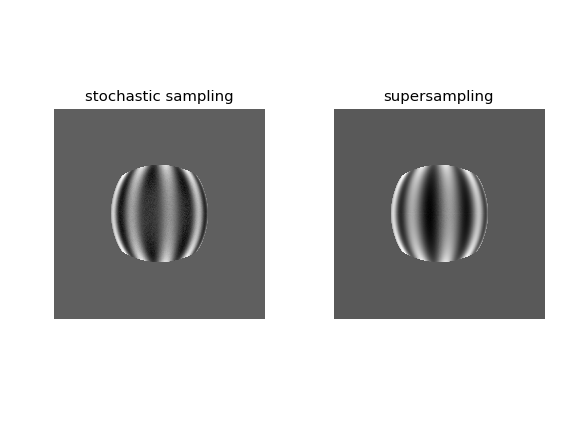

In [13]:
plt.figure()
plt.subplot(121)
plt.imshow(OMR_snell_stochastic,cmap='gray',interpolation='none')
plt.title('stochastic sampling')
plt.axis('off')
plt.subplot(122)
plt.imshow(OMR_snell,cmap='gray',interpolation='none')
plt.title('supersampling')
plt.axis('off')
plt.tight_layout()